In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
baseline = pd.read_csv('../../baseline_band_powers.csv')
recording = pd.read_csv('../../recording_band_powers.csv')
baseline_md = pd.read_csv('../../baseline_metadata.csv')

In [5]:
diff = recording - baseline

In [6]:
md = baseline_md[['subject_id', 'pace']]
md.head()

,subject_id,pace
0,1,Fast
1,1,Slow
2,10,Fast
3,10,Slow
4,11,Fast


In [7]:
alphas = ['alpha_temporal', 'alpha_parietal', 'alpha_frontal', 'alpha_occipital']
betas = ['beta_temporal', 'beta_parietal', 'beta_frontal', 'beta_occipital']
thetas = ['theta_temporal', 'theta_parietal', 'theta_frontal', 'theta_occipital']
deltas = ['delta_temporal', 'delta_parietal', 'delta_frontal', 'delta_occipital']
gammas = ['gamma_temporal', 'gamma_parietal', 'gamma_frontal', 'gamma_occipital']

In [8]:
def plot_difference(bands, band_name):
    band_df = diff[bands]
    band_df['pace'] = md['pace']
    band_df = band_df.melt(id_vars='pace', var_name='Region', value_name='Power Difference')
    
    # Plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Region', y='Power Difference', hue='pace', data=band_df)
    plt.title(f'{band_name} Power Difference Between Recording and Baseline')
    plt.ylabel('Power Difference (dB)')
    plt.xlabel('Brain Region')
    plt.legend(title='Pace')
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\591029073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_df['pace'] = md['pace']


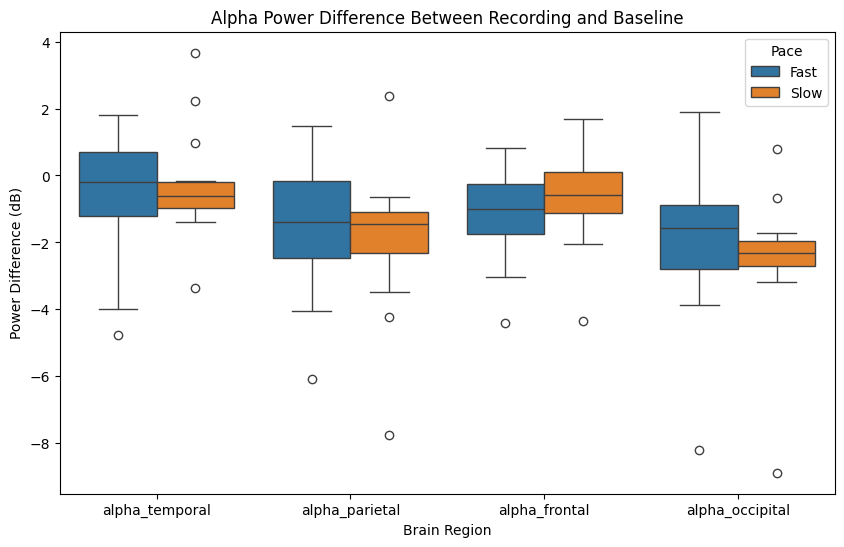

In [9]:
plot_difference(alphas, 'Alpha')

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\591029073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_df['pace'] = md['pace']


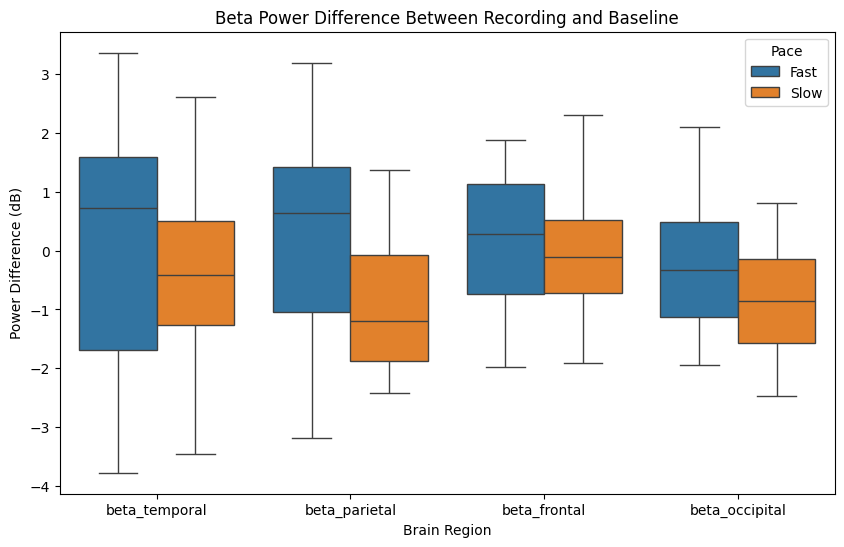

In [10]:
plot_difference(betas, 'Beta')

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\591029073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_df['pace'] = md['pace']


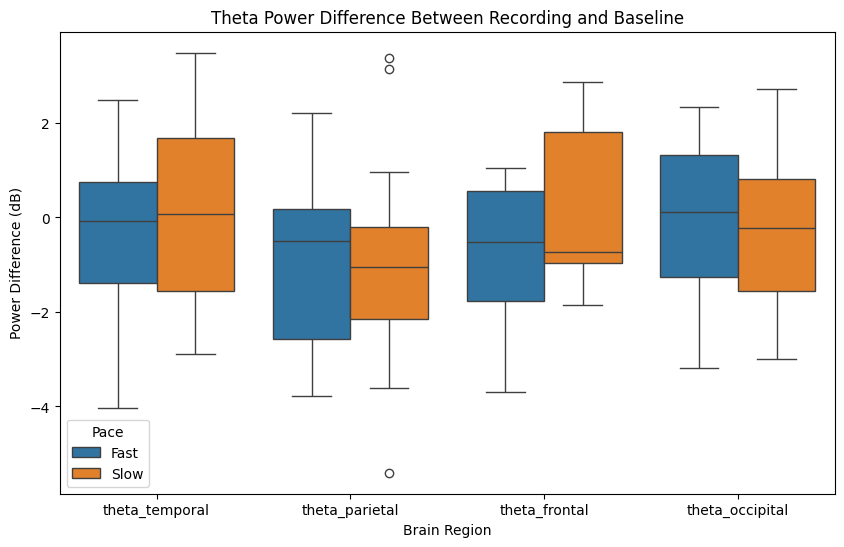

In [11]:
plot_difference(thetas, 'Theta')

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\591029073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_df['pace'] = md['pace']


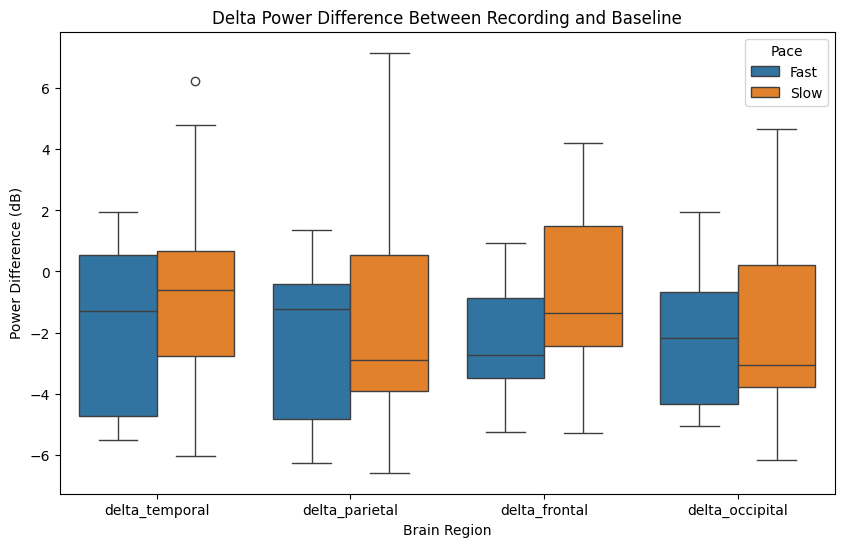

In [12]:
plot_difference(deltas, 'Delta')

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\591029073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_df['pace'] = md['pace']


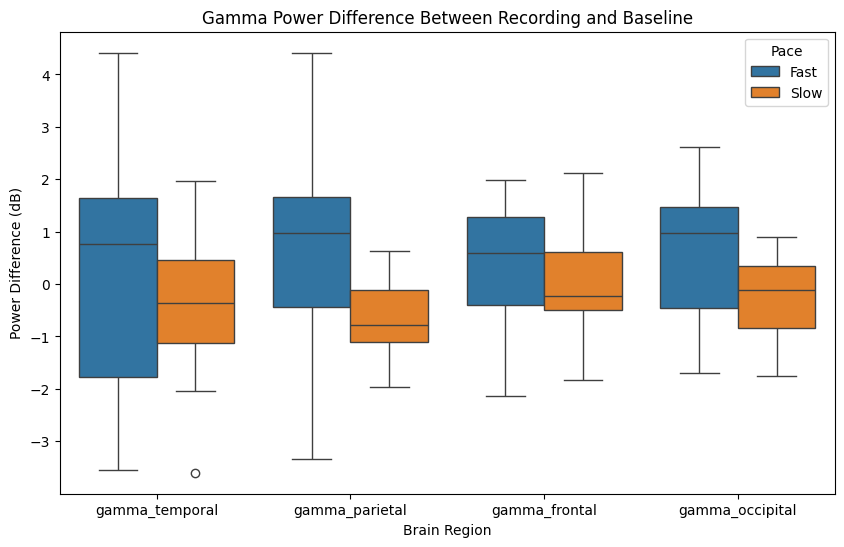

In [13]:
plot_difference(gammas, 'Gamma')

# Classification

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
X = diff
y = md['pace'].map({'Fast': 1, 'Slow': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled.shape, X_test_scaled.shape

((25, 20), (7, 20))

In [17]:
def perform_cross_validation(features, labels, model, cv=5, scoring='accuracy'):
    """
    Perform cross-validation on the given dataset and model.
    
    Parameters
    ----------
    features : numpy array or pandas DataFrame
        The input features for the model.
    labels : numpy array or pandas Series
        The target labels for the model.
    model : scikit-learn estimator
        The machine learning model to evaluate.
    cv : int, default=5
        The number of cross-validation folds.
    scoring : str, default='accuracy'
        The scoring metric to use for cross-validation.
    
    Returns
    -------
    scores : numpy array
        The cross-validation scores for each fold.
    mean_score : float
        The mean cross-validation score.
    std_score : float
        The standard deviation of the cross-validation scores.
    """
    # Perform cross-validation
    scores = cross_val_score(model, features, labels, cv=cv, scoring=scoring)
    
    # Calculate mean and standard deviation of scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    return scores, mean_score, std_score

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_scores, rf_mean_score, rf_std_score = perform_cross_validation(X_train_scaled, y_train, rf)
print(f'Random Forest Mean CV Score: {rf_mean_score:.4f} +/- {rf_std_score:.4f}')

Random Forest Mean CV Score: 0.6400 +/- 0.1960


In [19]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn_scores, knn_mean_score, knn_std_score = perform_cross_validation(X_train_scaled, y_train, knn)
print(f'K-Nearest Neighbors Mean CV Score: {knn_mean_score:.4f} +/- {knn_std_score:.4f}')

K-Nearest Neighbors Mean CV Score: 0.6000 +/- 0.1265


In [20]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_scores, xgb_mean_score, xgb_std_score = perform_cross_validation(X_train_scaled, y_train, xgb)
print(f'XGBoost Mean CV Score: {xgb_mean_score:.4f} +/- {xgb_std_score:.4f}')

XGBoost Mean CV Score: 0.5600 +/- 0.0800


# Deep Learning

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
Dropout(0.5)
model.add(Dense(8, activation='relu'))
Dropout(0.5)
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=2, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 30ms/step - loss: 0.7960 - accuracy: 0.5500 - val_loss: 1.1131 - val_accuracy: 0.2000
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7480 - accuracy: 0.5500 - val_loss: 1.0653 - val_accuracy: 0.2000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7167 - accuracy: 0.5500 - val_loss: 1.0223 - val_accuracy: 0.2000
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6856 - accuracy: 0.5500 - val_loss: 0.9801 - val_accuracy: 0.2000
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6597 - accuracy: 0.5500 - val_loss: 0.9533 - val_accuracy: 0.2000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6361 - accuracy: 0.6000 - val_loss: 0.9306 - val_accuracy: 0.2000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6228 - accuracy: 0.6500 - val_loss: 0.8925 - val_accuracy: 0.2000
Epoch 8/100

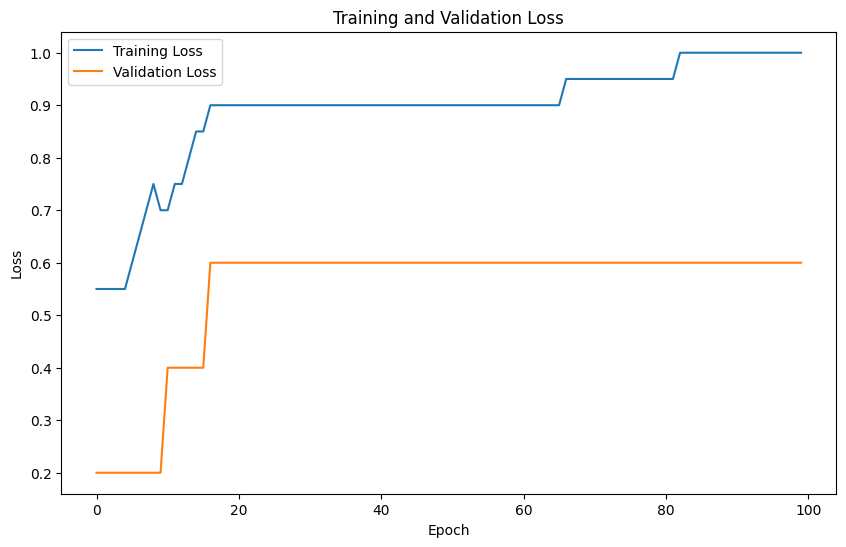

In [22]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()